In [1]:
#using DifferentialEquations
using Plots
using Statistics
using FFTW
FFTW.set_provider!("mkl")
#import Pkg; Pkg.add("FileIO")
using FileIO
using JLD2
using Base.Threads
using Distributions
using LaTeXStrings
using Printf
using LsqFit
using BenchmarkTools
using LinearAlgebra
using StaticArrays

In [2]:

include("../aux_functions.jl")

differentials

In [ ]:
SVector(1,1)

In [ ]:
J = 200
N = 8_000
M_g = 11
L = 200
dx = L/J
order = 5
par_grid = (N, L, J, dx, order)
v = rand(2N+J,M_g);
κ = 2π/L

t_i = 0.0
t_f = 2.0
M = 2001
dt = (t_f - t_i)/(M_g - 1)
par_evolv = (t_i, t_f, M, M_g, dt)

θ = 0.001
nm = 2
par_f = (θ, nm, κ)

In [ ]:
n = zeros(J)
ϕ = zeros(J)
Tn = zeros(J, nthreads())
par_density = (par_grid, Tn)
E_f = zeros(J)
get_density!(v[:,end], n, par_grid)
get_ϕ!(ϕ, n .- 1.0, κ)
get_E_from_ϕ!(ϕ,E_f,dx)
E_f_t = zeros(J)
get_density_threads!(v[:,end], n, par_density)
get_ϕ!(ϕ, n .- 1.0, κ)
get_E_from_ϕ!(ϕ,E_f_t,dx)
(E_f - E_f_t)'*(E_f - E_f_t)

In [ ]:
@time Energy_K, Energy_E, EField_T, p_T, Q_T, S_T, T = get_averages(v,par_grid,par_evolv, par_f);


In [ ]:
@time Energy_K_t, Energy_E_t, EField_T_t, p_T_t, Q_T_t, S_T_t, T_t = get_averages_threads(v,par_grid,par_evolv, par_f);

### Testing v2p and p2v



In [ ]:
p = rand(10)
m=2
v = p2v.(p;m=m)
p - v2p.(v;m=m)

In [ ]:
v = p2v.(p)
p - v2p.(v)

In [ ]:
v = [[0.2,0.3],[0.1,0.05]] # it works ok with lists of vectors too.
v2p.(v)

### Testing particles positions and momenta

In [ ]:
include("../aux_functions.jl")

D = 2
x = zeros(D)
p = zeros(D)

@show par_dis = [i for i in 1:4D]



i = 2
get_positions!(x,i,par_dis)

  
get_momenta!(p,i,par_dis)

@show x, p

## Testing index and y functions

In [ ]:
J=1000
L=100
s = 28.74
get_index_and_y(s,J,L)

In [ ]:
Jt = (100, 200, 200)
Box = (0.0, 10, 0.0, 20, -20.0, 0.0)
ss = [8.74, 8.74, -11.26]
j=[1,1,1]
y=zeros(3)
get_index_and_y!(j,y,ss,Jt,Box)

In [ ]:
Jt = (100, 200, 200)
Box = (0.0, 10, 0.0, 20, -20.0, 0.0)
ss = [8.74, 8.74, -11.26]
j=[1,1,1]
y=zeros(3)
r = view(ss,1:3)
get_index_and_y!(j,y,r,Jt,Box)

## Testing Shape Functions

In [ ]:
const cinco = 5
@btime W(5,$0.4)

In [ ]:
v = [0.5,0.5]
@show s = norm(v)

@btime W(5,0.7071067811865476)
@btime W(5,s)

In [ ]:
v = SVector(0.5,0.5)
@btime W(5,v)

In [ ]:
@btime norm([0.5,0.5],2)

In [ ]:
@btime sqrt($(0.5)^2+$(0.5)^2)

In [ ]:
@btime sqrt(v'*v)

In [ ]:
order = 5
x = -4:0.1:4
y = -4:0.1:4


f(order,x) = Shape(order,x[1])*Shape(order,x[2])

default(size=(600,600), fc=:heat)

z = Surface((x,y)->f(order,[x,y]), x, y)
surface(x,y,z, linealpha = 0.3)



## Density test

In [ ]:
N = 1
J = 20
L = 10
order = 5
par_grid = (N, L, J, L/J, order)
n = zeros(20)
u = [3.0]
get_density!(u,n,par_grid,0)
x = 0:L/J:(L-L/J)
plot(x,n)
scatter!(x,n)
#sum(n)/J

In [ ]:
N = 1
J = 20
L = 10
order = 5
par_grid = (N, L, J, L/J, order)
n = zeros(20)
u = [5.1]
get_density!(u,n,par_grid,0.5)
x = 0:L/J:(L-L/J)
plot(x,n)
scatter!(x,n)
#sum(n)/J

In [ ]:
include("../aux_functions.jl")
const N = 2_000
const J = (100,200)
const Box = (0.0,1.0,0.0,1.0)
const order = 5
const par_grid = (N, Box, J, order)
n1 = zeros(J)
#us = rand(4*N)
#u = deepcopy(us)
j = [0,0]
y = [0.0,0.0]
#@show r = view(u,1:2)
#@show get_index_and_y!(j,y,r,J,Box)
#@show j, y

#@btime get_density_2D!($u,$n1,$par_grid,$0)
get_density_2D!(u,n1,par_grid,0)
#plot_matrix(n)
#sum(n)

In [ ]:
include("../aux_functions.jl")
#const N = 2_000_000
#const N = 2_0
#const J = (200,100)
#const Box = (0.0,1.0,0.0,1.0)
#const order = 5
#const par_grid = (N, Box, J, order)

#u = rand(4*N)
#u_r = [0.501,0.403]
n2 = zeros(J)
Tn = Array{Float64}(undef,(J...,nthreads()))
j = Array{Int64}(undef,2,nthreads())
y = Array{Float64}(undef,2,nthreads())

#j = [[1,1] for i in 1:nthreads()] 
#y = [[1.0,1.0] for i in  1:nthreads()]
N
#@btime get_density_threads_2D!(u,n2,(par_grid,Tn,j,y),0)
@btime get_density_threads_2D!($u,$n2,$(par_grid,Tn),$0)

3.664 ms (12029 allocations: 1.07 MiB) con y,j definidas afuera

3.602 ms (12031 allocations: 1.07 MiB) con y,j definidas dentro

3.597 ms (12030 allocations: 1.07 MiB) con \$

3.285 ms (12030 allocations: 1.07 MiB) con \$ and @inbounds

3.334 ms (12032 allocations: 1.07 MiB) con s y u_r

**No se que produce todas esas allocations**

In [ ]:
j[1]= [1,2]
j[2]= [3,4]

In [ ]:
j[1]

In [ ]:
@show sum(n1) sum(n2) norm(n2-n1) 

In [ ]:
heatmap(n1-n2,
        #c = cgrad([:blue,:white,:red]),
        fc = :ocean,
        linealpha = 0.8, fillalpha=0.8,
        #yflip = true,
        xlabel = "x", ylabel = "y",
        title = "density"
    )

In [ ]:
N = 2000
J = (20,30)
Box = (0.0,10.0,0.0,20.0)
order = 5
par_grid = (N, Box, J, order)
n = zeros(J[1],J[2])
u = rand(4N)*10
#u = [3.1,3.2,0.0,0.0,6.4,7.5,0.0,0.0]
j = [0,0]
y = [0.0,0.0]

get_density_2D!(u,n,par_grid,0);

In [ ]:
heatmap(n',
        #c = cgrad([:blue,:white,:red]),
        fc = :ocean,
        linealpha = 0.8, fillalpha=0.8,
        #yflip = true,
        xlabel = "x", ylabel = "y",
        title = "density"
    )

## Test Currents

In [3]:
include("../aux_functions.jl")
const N = 2_000
const J = (100,200)
const Box = (0.0,1.0,0.0,1.0)
const order = 5
const par_grid = (N, Box, J, order)

#ur = [0.0,0.0,0.0,0.0]


ur = []
for i in 1:N
    u1 = Box[2]*rand()
    u2 = Box[4]*rand()
    u3 = (1.0 - 2.0*rand())
    u4 = (1.0 - 2.0*rand())
    ur = append!(ur,[u1,u2,u3,u4])
    #@show ur
end
u = deepcopy(ur)



8000-element Vector{Any}:
  0.3037896295613788
  0.22648834450013078
  0.946690523583767
  0.37398442404003185
  0.741148349460764
  0.7367868302858713
 -0.011635814363572416
  0.8346105048512797
  0.24392731436025117
  0.3477280787794601
  ⋮
  0.21862903985548843
  0.4021907940332461
  0.11100649535680218
  0.041121653346041454
  0.8898520935622416
  0.06004053420816047
  0.15081043011877415
  0.8872010854239347
  0.37458866616375186

In [4]:

S1 = [[0.0,0.0] for i in 1:J[1], j in 1:J[2]]
j = [0,0]
y = [0.0,0.0]

#get_current_rel_2D!(u,S1,par_grid)
#plot_matrix(getindex.(S1,1))
#sum(getindex(S1,1))
#S1

2-element Vector{Float64}:
 0.0
 0.0

In [5]:
include("../aux_functions.jl")
TS = zeros((2,J...,nthreads()))
S2 = [[0.0,0.0] for i in 1:J[1], j in 1:J[2]]
par_threads = (par_grid, TS)
shift = 0.0
#get_current_threads_2D!(u, S2, par_threads)

0.0

In [24]:
norm(S1-S2)

2.9091214927672254e-19

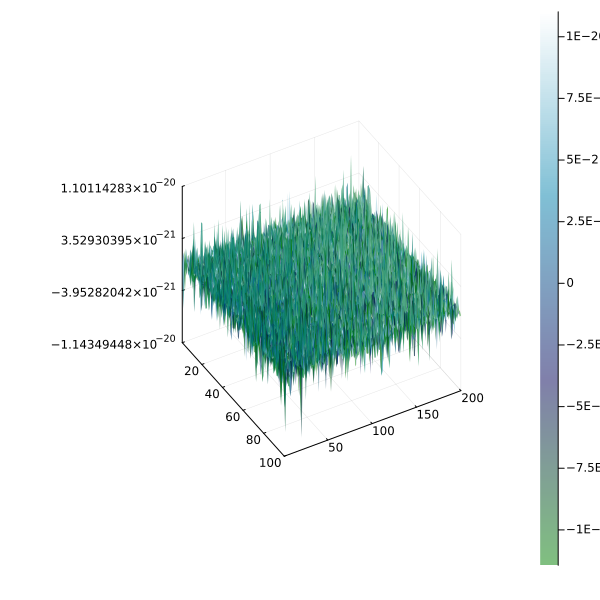

In [25]:
plot_matrix(getindex.(S1-S2,1))

In [6]:
@btime get_current_rel_2D!($u, $S1, $par_grid)


  77.445 ms (800003 allocations: 43.70 MiB)


100×200 Matrix{Vector{Float64}}:
 [2.55171e-5, -6.51413e-5]    …  [3.81996e-5, -9.39047e-5]
 [3.3452e-6, -9.99494e-5]        [8.36572e-6, -6.55312e-5]
 [-2.14848e-5, -0.000112858]     [-4.88257e-5, -7.21554e-5]
 [-5.55985e-6, -2.15336e-5]      [-3.79393e-5, -4.39414e-5]
 [-1.34439e-8, 9.1111e-7]        [-2.27494e-6, 1.73194e-6]
 [1.12362e-7, 8.15674e-7]     …  [4.8845e-7, 3.54582e-6]
 [1.31366e-7, -1.08672e-7]       [2.99598e-8, 1.87322e-7]
 [1.13648e-5, -1.82608e-5]       [8.79928e-8, -2.39226e-6]
 [3.69175e-5, -6.4828e-5]        [2.57237e-7, -8.36985e-6]
 [1.30841e-5, -2.50184e-5]       [7.80316e-8, -3.19259e-6]
 ⋮                            ⋱  
 [1.88069e-6, -1.97675e-6]       [2.88015e-6, -4.71775e-6]
 [3.49137e-5, -3.6697e-5]        [5.0935e-5, -5.48687e-5]
 [5.04716e-5, -5.30497e-5]       [7.34771e-5, -7.73173e-5]
 [7.34406e-6, -7.71922e-6]       [1.06903e-5, -1.12363e-5]
 [3.24464e-9, -3.41742e-9]    …  [4.67195e-9, -4.91058e-9]
 [1.15699e-13, -1.44805e-13]     [0.0, 0.0]
 [0.0,

In [10]:
include("../aux_functions.jl")
@btime get_current_threads_2D!($u, $S2, $par_threads)


  31.790 ms (1144030 allocations: 83.10 MiB)


### Timing in MacPro:

```
const N = 2_000_000
const J = (100,200)
const Box = (0.0,1.0,0.0,1.0)
const order = 5
```
**With N=2000**

75.642 ms (800003 allocations: 43.70 MiB) **no Threads**

32.303 ms (1144032 allocations: 83.25 MiB) 

25.874 ms (986029 allocations: 75.23 MiB) **alt version**

**With N=2_000_000**

89.926 s (800000003 allocations: 42.53 GiB) **no Threads**

### Timing in Atom:

**With N=2000**

56.319 ms (800003 allocations: 43.70 MiB) **no Threads**

39.771 ms (1104016 allocations: 80.05 MiB) **t= 1 script**

8.213 ms (1384104 allocations: 101.42 MiB) **t= 8 script**

7.419 ms (1464129 allocations: 107.53 MiB) **t= 10 script**

8.596 ms (1464128 allocations: 107.53 MiB) **t= 10** 

9.967 ms (986127 allocations: 75.24 MiB) **t= 10 alt**

10.422 ms (1624177 allocations: 119.74 MiB) **t= 14 script**

5.905 ms (1704200 allocations: 125.84 MiB)  **t= 16 script**

6.035 ms (1864248 allocations: 138.06 MiB) **t= 20**

5.397 ms (1864248 allocations: 138.06 MiB) **t= 20 script**

9.577 ms (986246 allocations: 75.25 MiB) **t= 20 alt**

12.651 ms (986246 allocations: 75.25 MiB) **t= 20 alt**

8.707 ms (2664489 allocations: 199.11 MiB) **t= 40 s**

**with N = 2_000_000**

67.396 s (1065600496 allocations: 75.31 GiB) **t= 40**

65.683 s (1065600501 allocations: 75.31 GiB) **t= 40 repetido en otro momento**

51.081 s (1064800251 allocations: 75.25 GiB) **t= 20**

44.452 s (986800253 allocations: 73.52 GiB) **t= 20 with type annotations**

44.989 s (986800253 allocations: 73.52 GiB) **t= 20 with type annotations + fastmath**

37.470 s (1064400135 allocations: 75.22 GiB) **t= 10**

44.601 s (986000131 allocations: 73.46 GiB) **t= 10 alt**

35.511 s (1064320105 allocations: 75.22 GiB) **t= 8**

33.460 s (986320106 allocations: 73.49 GiB) **t= 8 with type annotations + fastmath**

39.071 s (986000103 allocations: 73.46 GiB) **t= 8 alt**

36.185 s (1064240082 allocations: 75.21 GiB) **t= 6**

## 1D numbers in Atom

N = 2_000_000
L = 1.0
J = 100

1.697 s (92000081 allocations: 1.40 GiB) **t= 6**

1.518 s (92000105 allocations: 1.40 GiB) **t= 8**

1.394 s (92000128 allocations: 1.40 GiB) **t= 10**

1.194 s (92000202 allocations: 1.40 GiB) **t= 16**

548.368 ms (92000250 allocations: 1.40 GiB) **t= 20**

273.497 ms (92000489 allocations: 1.40 GiB) **t= 40**

104.099 ms (488 allocations: 46.28 KiB) **t= 40, with annotated types**

**Aquí escalea bien!**




In [21]:
M = 300000
A = Array{Float64,3}(undef,2,M,M)

for l in 1:2
    for j in 1:M
        for i in 1:M
            A[l,i,j] = i+j*M+l*M*2
        end
    end
end

B = similar(A)

for l in 1:2
    for j in 1:M
        for i in 1:M
            B[l,i,j] = -(i+j*M+l*M*2)
        end
    end
end

In [32]:
function algo(A,B)
        
            for j in 1:M
                for i in 1:M
                    for l in 1:2
                    B[l,i,j] = B[l,i,j] + 0.5*A[l,i,j] .-0.3*(i+j*M+l*M*2)
                end
            end
        end
        return B[:,:,:]
    end

    @btime algo(A,B)

  14.526 μs (161 allocations: 3.52 KiB)


2×3×3 Array{Float64, 3}:
[:, :, 1] =
 3.36505e6  3.70155e6  4.03806e6
 5.38408e6  5.72058e6  6.05709e6

[:, :, 2] =
 4.37456e6  4.71107e6  5.04757e6
 6.39359e6  6.7301e6   7.0666e6

[:, :, 3] =
 5.38408e6  5.72058e6  6.05709e6
 7.40311e6  7.73961e6  8.07612e6

B[l,i,j] 2xMxM M = 300000

| position | values |
|--------|--------------------------------------|
|l, j, i | 15.498 μs (177 allocations: 4.02 KiB)|
|l, i, j | 15.328 μs (177 allocations: 4.02 KiB)|
|i, j, l | 14.368 μs (161 allocations: 3.52 KiB)|
|j, i, l | 14.526 μs (161 allocations: 3.52 KiB)|

In [58]:
A2 = [[0.0,0.0] for i in 1:M, j in 1:M]

function carga_A2(A2)
    @fastmath for j in 1:M
        for i in 1:M
        A2[i,j] = [i*j,2i*j]
        end
    end
end

@btime carga_A2(A2)

  5.004 μs (34 allocations: 1.91 KiB)


i,j 5.016 μs (34 allocations: 1.91 KiB)
j,i 5.012 μs (34 allocations: 1.91 KiB)
i,j 5.007 μs (34 allocations: 1.91 KiB) @fastmath
j,i 5.004 μs (34 allocations: 1.91 KiB) @fastmath

In [56]:
A1 = [Float64(0.0) for l in 1:2, i in 1:M, j in 1:M]

function carga_A1(A1)
    @fastmath for j in 1:M
            for i in 1:M 
              for l in 1:2
                A1[l,i,j] = i*j*l
            end
        end
    end
end

@btime carga_A1(A1)

  1.097 μs (16 allocations: 512 bytes)


j, i, l 1.382 μs (16 allocations: 512 bytes)
i, j, l 1.395 μs (16 allocations: 512 bytes)
l, i, j 2.122 μs (32 allocations: 1.00 KiB) 
l, i, j 1.964 μs (32 allocations: 1.00 KiB) @fastmath 
l, i, j 2.248 μs (32 allocations: 1.00 KiB) @inbounds
i, j, l 1.116 μs (16 allocations: 512 bytes) @fastmath
j, i, l 1.129 μs (16 allocations: 512 bytes) @fastmath
j, i, l 1.562 μs (14 allocations: 448 bytes) @simd
j, i, l 1.097 μs (16 allocations: 512 bytes) @fastmath

### With static arrays

In [ ]:
const N = 2_000
const J = (100,200)
const Box = (0.0,1.0,0.0,1.0)
const order = 5
const par_grid = (N, Box, J, order)

#ur = [0.0,0.0,0.0,0.0]


ur = []
for i in 1:N
    u1 = Box[2]*rand()
    u2 = Box[4]*rand()
    u3 = (1.0 - 2.0*rand())
    u4 = (1.0 - 2.0*rand())
    ur = append!(ur,[u1,u2,u3,u4])
    #@show ur
end
u = deepcopy(ur)


In [ ]:
include("../aux_functions.jl")
TSs = zeros((2,J...,nthreads()))
set_zero_subnormals = [[0.0,0.0] for i in 1:J[1], j in 1:J[2]]
par_threads = (par_grid, TSs)
shift = 0.0


## Test Volume and differentials




In [ ]:

Box = (0.0,10, 0.0, 20, -10.0, 10)
J = (100,100,200)

@show volume(Box)
@show differentials(Box,J)

### Test make_periodic function (OK)

In [ ]:
include("../aux_functions.jl")
r = [2.,6.1,4.,5.,6.3,7.2,8.,9.2]
Box = (1.,2.2,3.,5.)
make_periodic!(r,Box)

In [ ]:
r

In [ ]:
A = [[0,0] for i in 1:10, j in 1:8]

In [ ]:
A[1,2]

## Test Poisson equation

In [ ]:
include("../aux_functions.jl")
J = (100,100)
Box = (0,1,0,2)
ϕ = zeros(J)

n = [0.1*i*j for i in 1:J[1], j in 1:J[2]]

get_ϕ_D!(ϕ, n, Box)


## Field tests

In [ ]:
N = 5
D=2
par_dis = [2D*N]
J = (12,8)

E = [[i,j] for i in 1:J[1], j in 1:J[2] ]
B = [ i*j for i in 1:J[1], j in 1:J[2] ]

E
#E[1,2]
#getindex.(E,1)


In [ ]:
Me = J[1]*J[2]
EL = zeros(2Me)
for i in 1:J[1]
    for j in 1:J[2]
        l = 2*(j-1)*J[1] + 2*i -1
            EL[l] = E[i,j][1]
            EL[l+1] = E[i,j][2]
    end
end
EL
#E_v = reshape(EL,D,J[2],J[1])
#E_v[1,:,:]

In [ ]:
Em = reshape(EL,D,J[1]*J[2])'
Emm = reshape(Em,(J...,D))

In [ ]:
getindex.(E,2) - Emm[:,:,2]

In [ ]:
Emm[2,3,:]

In [ ]:
reshape(EE,2,100,100)[1,:,:] - 5*reshape(EE,2,100,100)[2,:,:]

8.361 μs (2 allocations: 96 bytes) (i,j)

7.730 μs (2 allocations: 96 bytes) (j,i)

18.307 μs (6 allocations: 156.44 KiB) (sin los for)

In [62]:
Int64(ceil(3/2))

2